<a href="https://colab.research.google.com/github/Raisibe1/Father-s-day/blob/main/Q5_ITSCA2_SUMMATIVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix:
 [[71  0]
 [ 5 38]]
Test Accuracy: 0.956140350877193
Train Accuracy: 0.9406593406593406


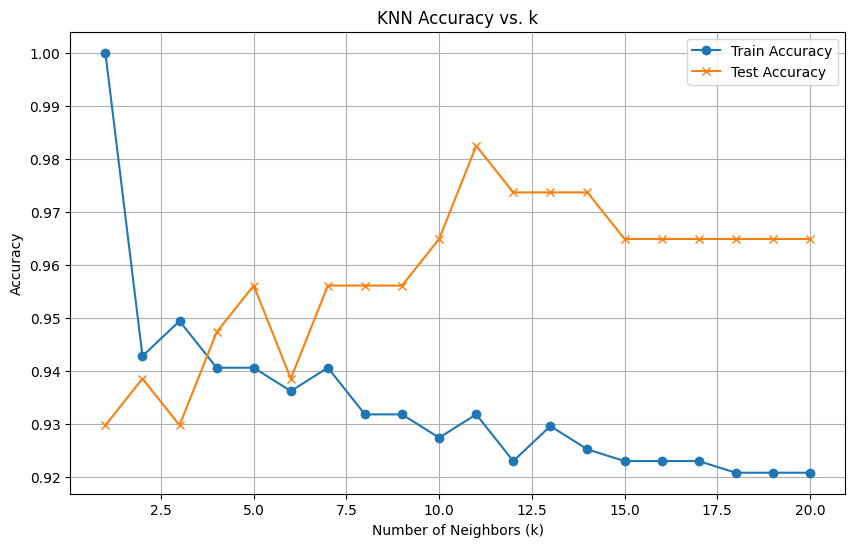

k=5 achieved a Test Accuracy of 95.61% and Train Accuracy of 94.07%. The confusion matrix indicates strong performance with no false positives and only 5 false negatives. The model shows good generalization without overfitting, as evidenced by the similar train and test accuracies


In [ ]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# 2. Load the dataset with correct delimiter and clean it
df = pd.read_csv("Cancer_Data.csv", delimiter=';')
df_cleaned = df.dropna()

# 3. Split into features and target
X = df_cleaned.drop(columns=["id", "diagnosis"])
y = df_cleaned["diagnosis"]

# 4. Encode target: M=1, B=0
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5. Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 6. Train KNN model (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 7. Evaluate model
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Confusion matrix and accuracy
cm = confusion_matrix(y_test, y_test_pred)
acc_test = accuracy_score(y_test, y_test_pred)
acc_train = accuracy_score(y_train, y_train_pred)

print("Confusion Matrix:\n", cm)
print("Test Accuracy:", acc_test)
print("Train Accuracy:", acc_train)

# 8. Plot accuracy vs. different k values
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(k_values, test_accuracies, label="Test Accuracy", marker='x')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k")
plt.legend()
plt.grid(True)
plt.show()

print("k=5 achieved a Test Accuracy of 95.61% and Train Accuracy of 94.07%. The confusion matrix indicates strong performance with no false positives and only 5 false negatives. The model shows good generalization without overfitting, as evidenced by the similar train and test accuracies" )